In [1]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv(r"Traffic_Violations.csv")

In [3]:
year_of_stop=[int(x[-4:]) for x in df['Date Of Stop']]

car_year = []
for x in df['Year']:
    try:
        car_year.append(int(x))
    except:
        car_year.append(np.nan)

def subtract(a,b):
    try:
        return a-b
    except:
        return np.nan

df['Car Age'] = [subtract(x[0], x[1]) for x in zip(year_of_stop, car_year)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215D0CA5508>]],
      dtype=object)

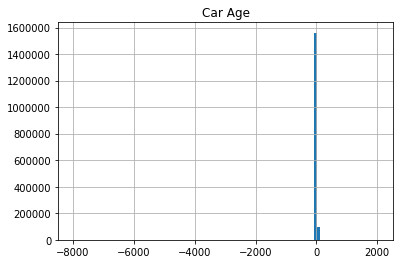

In [18]:
df.hist('Car Age', bins=100)

In [9]:
df['Car Age'] = [int(df['Date Of Stop'].iloc[i][-4:]) - int(df['Year'].iloc[i]) for i,x in enumerate(df['Year'])]

ValueError: cannot convert float NaN to integer

In [10]:
year_of_stop=[]
for x in df['Date Of Stop']:
    if not x.isnan():
        year_of_stop.append(int(x[-4:]))
    else:
        year_of_stop.append(np.nan)

car_year = []
for x in df['Year']:
    if not x.isnan():
        car_year.append(int(x))
    else:
        car_year.append(np.nan)

age_of_car = []
for x in zip(car_year, year_of_stop):
    if not any(y.isnan() for y in x):
        age_of_car.append(x[1] - x[0])
    else:
        age_of_car.append(np.nan)
        

AttributeError: 'str' object has no attribute 'isnan'

In [ ]:
print(age_of_car[:10], zip(car_year, year_of_stop)[:10])

In [ ]:
df['Time']

In [31]:
sorted(df.columns)

['1st District, Rockville',
 '2nd District, Bethesda',
 '3rd District, Silver Spring',
 '4th District, Wheaton',
 '5th District, Germantown',
 '6th District, Gaithersburg / Montgomery Village',
 'Accident',
 'Agency',
 'Alcohol',
 'Arrest Type',
 'Article',
 'Belts',
 'Charge',
 'Color',
 'Commercial License',
 'Commercial Vehicle',
 'Contributed To Accident',
 'DL State',
 'Date Of Stop',
 'Description',
 'Driver City',
 'Driver State',
 'Fatal',
 'Gender',
 'HAZMAT',
 'Headquarters and Special Operations',
 'Latitude',
 'Location',
 'Longitude',
 'Make',
 'Model',
 'Number of Citations',
 'Personal Injury',
 'Property Damage',
 'Race',
 'S15',
 'Search Arrest Reason',
 'Search Conducted',
 'Search Disposition',
 'Search Outcome',
 'Search Reason',
 'Search Reason For Stop',
 'Search Type',
 'State',
 'SubAgency',
 'Time Of Stop',
 'Unique Stop ID',
 'Unnamed: 0',
 'VehicleType',
 'Violation Type',
 'W15',
 'Work Zone',
 'Year']

In [28]:
df = pd.concat([df, pd.get_dummies(df['SubAgency'])], axis=1)
df.head()

,Unnamed: 0,Unique Stop ID,Date Of Stop,Time Of Stop,Number of Citations,Agency,SubAgency,Description,Location,Latitude,...,Arrest Type,"1st District, Rockville","2nd District, Bethesda","3rd District, Silver Spring","4th District, Wheaton","5th District, Germantown","6th District, Gaithersburg / Montgomery Village",Headquarters and Special Operations,S15,W15
0,0,845c2732-d70b-42ef-bde8-603f9563aa2801/01/2012...,01/01/2012,00:43:00,0,MCP,Headquarters and Special Operations,LEFT TURN FROM IMPROPER ROAD POSITION,FENTON AT CAMERON,39.00102,...,A - Marked Patrol,0,0,0,0,0,0,1,0,0
1,1,b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb01/01/2012...,01/01/2012,00:52:00,7,MCP,"3rd District, Silver Spring",DRIVING WHILE IMPAIRED BY ALCOHOL,PINEY BRANCH ROAD @ ARLISS STREET,0.00000,...,A - Marked Patrol,0,0,1,0,0,0,0,0,0
2,2,b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb01/01/2012...,01/01/2012,00:52:00,7,MCP,"3rd District, Silver Spring",DRIVER CONSUMING ALCOHOLIC BEVERAGE IN PASSENG...,PINEY BRANCH ROAD @ ARLISS STREET,0.00000,...,A - Marked Patrol,0,0,1,0,0,0,0,0,0
3,3,b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb01/01/2012...,01/01/2012,00:52:00,7,MCP,"3rd District, Silver Spring",KNOWINGLY DRIVING UNINSURED VEHICLE,PINEY BRANCH ROAD @ ARLISS STREET,0.00000,...,A - Marked Patrol,0,0,1,0,0,0,0,0,0
4,4,b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb01/01/2012...,01/01/2012,00:52:00,7,MCP,"3rd District, Silver Spring",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,PINEY BRANCH ROAD @ ARLISS STREET,0.00000,...,A - Marked Patrol,0,0,1,0,0,0,0,0,0


In [26]:
print(pd.concat([pd.get_dummies(df['SubAgency']])))

,"1st District, Rockville","2nd District, Bethesda","3rd District, Silver Spring","4th District, Wheaton","5th District, Germantown","6th District, Gaithersburg / Montgomery Village",Headquarters and Special Operations,S15,W15
0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1670280,0,0,0,0,0,0,0,0,0
1670281,0,0,0,0,0,0,0,0,0
1670282,0,0,0,0,0,0,0,0,0
1670283,0,0,0,0,0,0,0,0,0


In [25]:
df.head()

,Unnamed: 0,Unique Stop ID,Date Of Stop,Time Of Stop,Number of Citations,Agency,SubAgency,Description,Location,Latitude,...,Arrest Type,"1st District, Rockville","2nd District, Bethesda","3rd District, Silver Spring","4th District, Wheaton","5th District, Germantown","6th District, Gaithersburg / Montgomery Village",Headquarters and Special Operations,S15,W15
0,0.0,845c2732-d70b-42ef-bde8-603f9563aa2801/01/2012...,01/01/2012,00:43:00,0.0,MCP,Headquarters and Special Operations,LEFT TURN FROM IMPROPER ROAD POSITION,FENTON AT CAMERON,39.00102,...,A - Marked Patrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb01/01/2012...,01/01/2012,00:52:00,7.0,MCP,"3rd District, Silver Spring",DRIVING WHILE IMPAIRED BY ALCOHOL,PINEY BRANCH ROAD @ ARLISS STREET,0.00000,...,A - Marked Patrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb01/01/2012...,01/01/2012,00:52:00,7.0,MCP,"3rd District, Silver Spring",DRIVER CONSUMING ALCOHOLIC BEVERAGE IN PASSENG...,PINEY BRANCH ROAD @ ARLISS STREET,0.00000,...,A - Marked Patrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb01/01/2012...,01/01/2012,00:52:00,7.0,MCP,"3rd District, Silver Spring",KNOWINGLY DRIVING UNINSURED VEHICLE,PINEY BRANCH ROAD @ ARLISS STREET,0.00000,...,A - Marked Patrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,b1463ded-4b1a-4e7f-ada9-9211bbdc1cbb01/01/2012...,01/01/2012,00:52:00,7.0,MCP,"3rd District, Silver Spring",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,PINEY BRANCH ROAD @ ARLISS STREET,0.00000,...,A - Marked Patrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
